In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
insurance=pd.read_csv('/content/new_insurance_data (1).csv')

In [ ]:
insurance.head()    #EDA means null values ,duplicate values exploring the data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
#target column is the charges and it is dependent on various input columns

In [ ]:
insurance.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [ ]:
insurance.shape

(1338, 13)

If the target column is in numerical data then it is regression and regressions has many types of data for example decision tree regressior,linear regression,random Forest regressor.



In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#object means categorical data in the form of a string

In [ ]:
insurance.isnull()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#We can't see all the rows and columns so for that we use aggregate function sum

In [ ]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
insurance.isnull().sum().sum()

52

In [ ]:
#we can use drop or replace with mean ,median ,mode

In [ ]:
#if the total null values are greater than 30% of entire data then replace the null value
#else if the total null value is less than 30% of entire data than drop

In [ ]:
#if the data is numeric replace it with mean/median
#if the data is numerical replace it with mode

#replacing is done using fillna function

In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
col=list(insurance.columns)

In [ ]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
for col_name in col:
  if insurance[col_name].dtype=='object':
    insurance[col_name]=insurance[col_name].fillna(insurance[col_name].mode()[0])
  else:
    insurance[col_name]=insurance[col_name].fillna(insurance[col_name].mean())

In [ ]:
insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
insurance.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [ ]:
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges


In [ ]:
insurance.duplicated().sum()

0

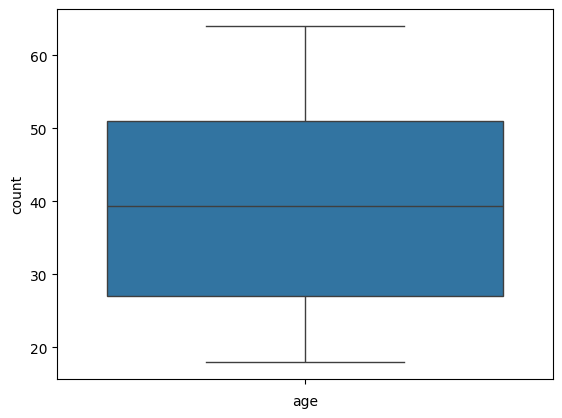

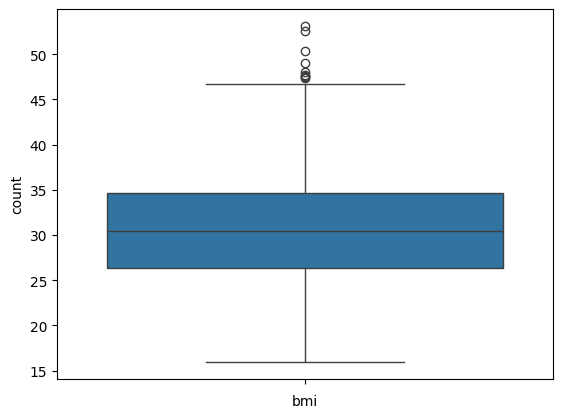

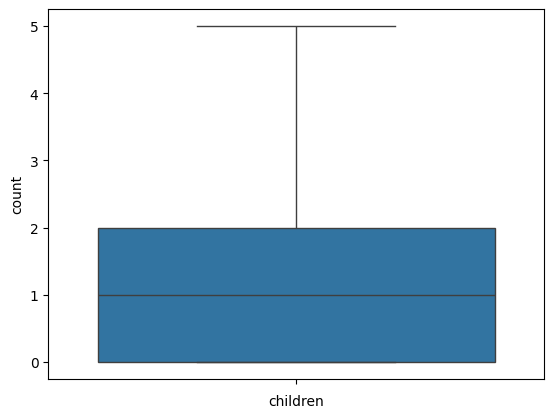

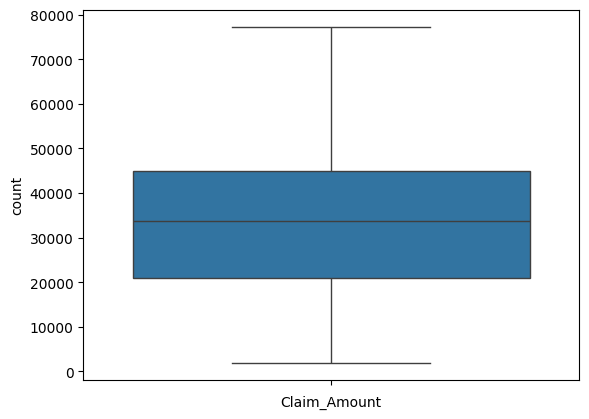

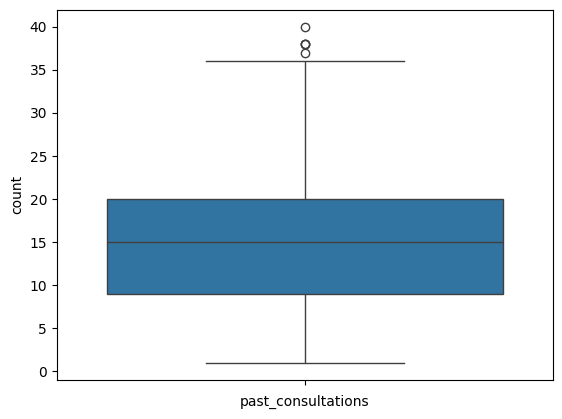

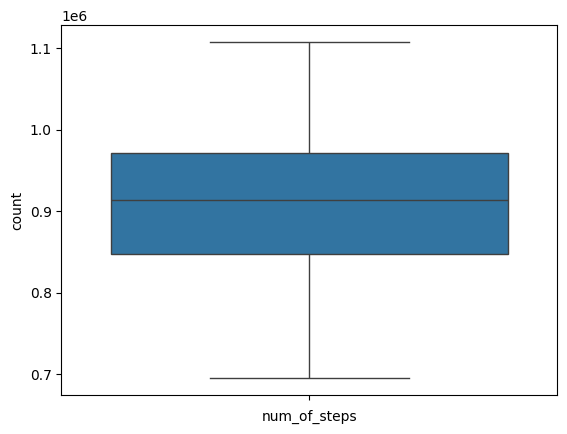

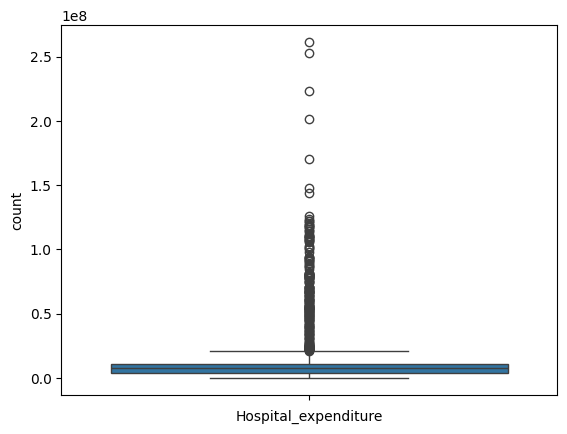

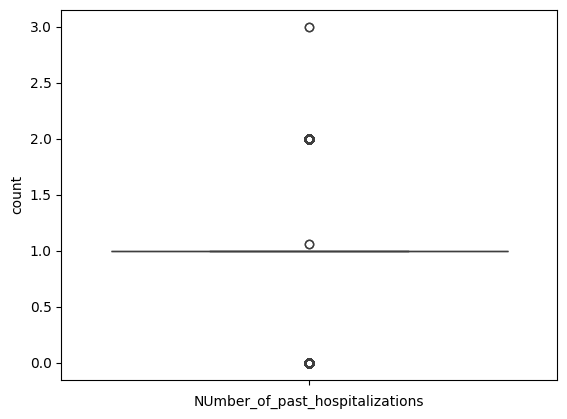

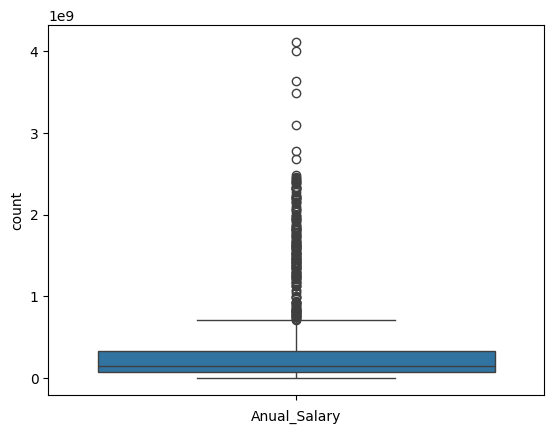

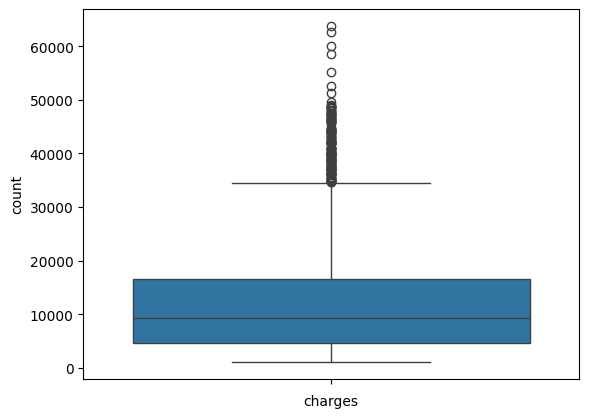

In [ ]:
for col_name in col:
  if insurance[col_name].dtype=='int64' or insurance[col_name].dtype=='float64':
    sns.boxplot(insurance[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [ ]:
q1=insurance['bmi'].quantile(0.25)
q3=insurance['bmi'].quantile(0.75)
iqr=q3-q1

In [ ]:
insurance=insurance[(insurance['bmi']>=(q1-1.5*iqr))&(insurance['bmi']<=q3+1.5*iqr)]

In [ ]:
q1=insurance['past_consultations'].quantile(0.25)
q3=insurance['past_consultations'].quantile(0.75)
iqr=q3-q1

In [ ]:
insurance=insurance[(insurance['past_consultations']>=(q1-1.5*iqr))&(insurance['past_consultations']<=q3+1.5*iqr)]

In [ ]:
q1=insurance['Hospital_expenditure'].quantile(0.25)
q3=insurance['Hospital_expenditure'].quantile(0.75)
iqr=q3-q1

In [ ]:
insurance=insurance[(insurance['Hospital_expenditure']>=(q1-1.5*iqr))&(insurance['Hospital_expenditure']<=q3+1.5*iqr)]

In [ ]:
q1=insurance['Anual_Salary'].quantile(0.25)
q3=insurance['Anual_Salary'].quantile(0.75)
iqr=q3-q1

In [ ]:
insurance=insurance[(insurance['Anual_Salary']>=(q1-1.5*iqr))&(insurance['Anual_Salary']<=q3+1.5*iqr)]

In [ ]:
insurance.shape

(1030, 13)

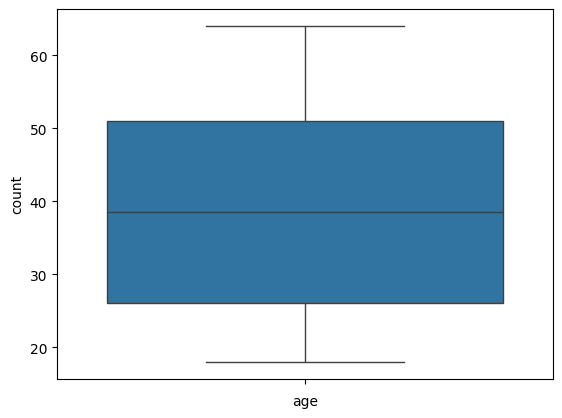

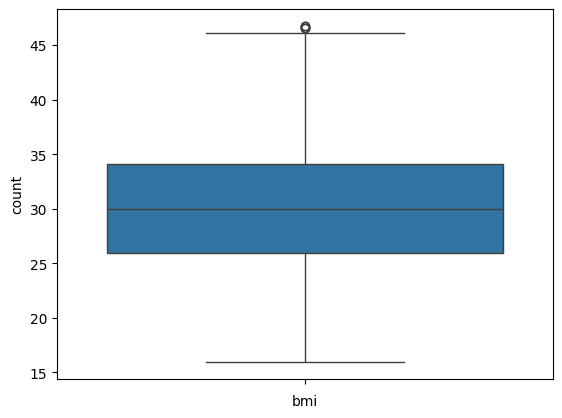

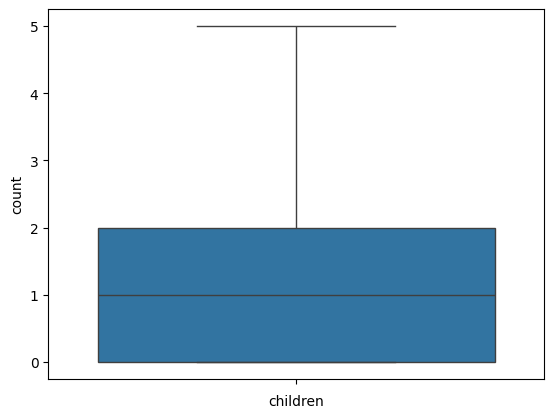

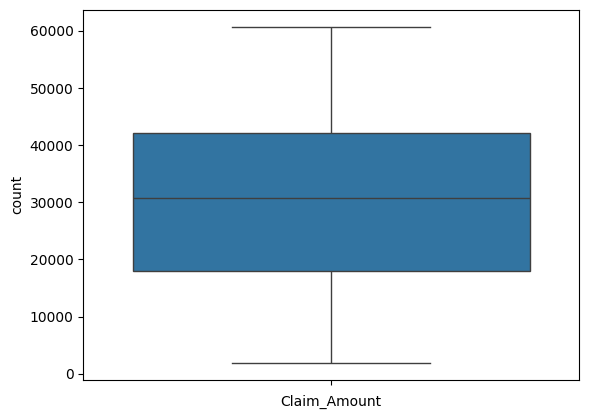

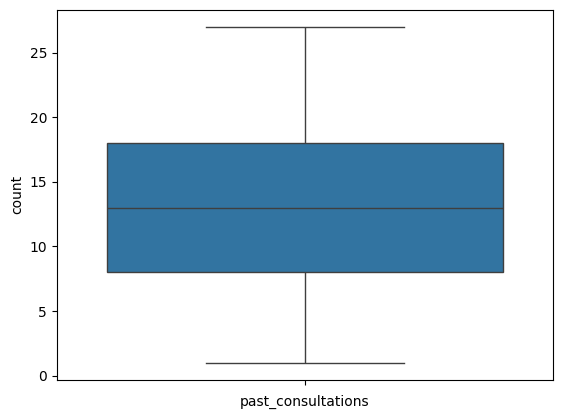

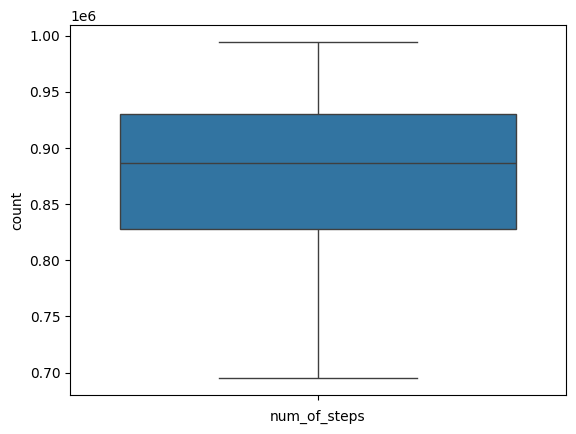

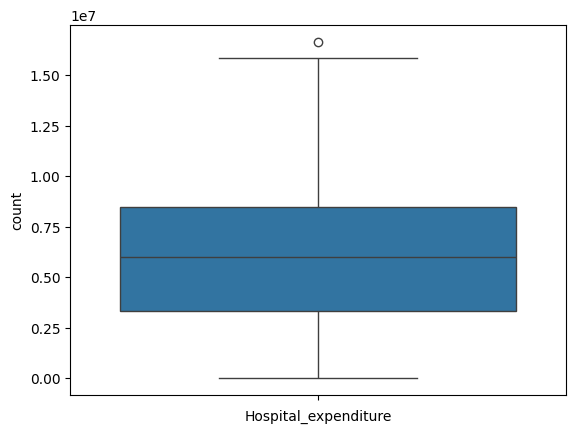

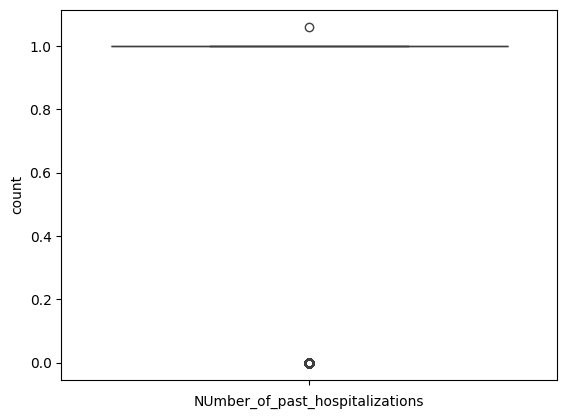

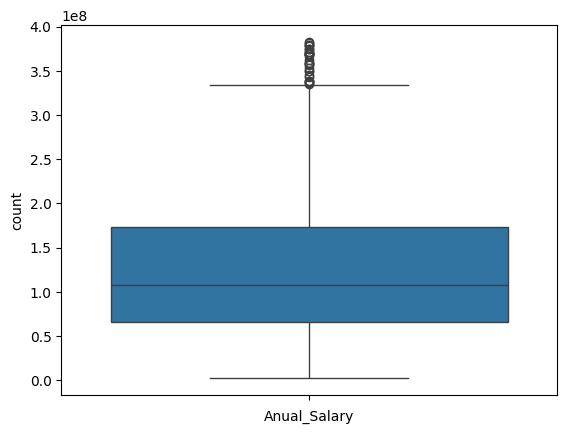

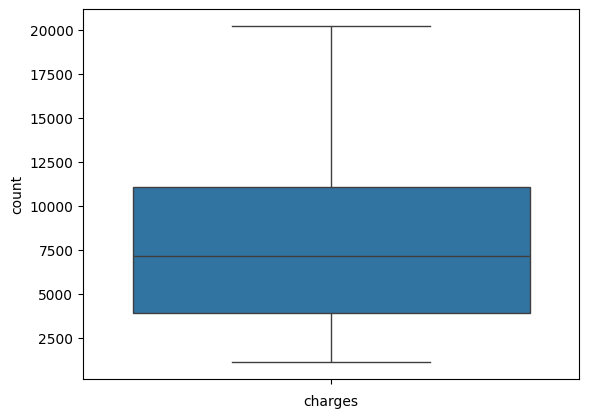

In [ ]:
for col_name in col:
  if insurance[col_name].dtype=='int64' or insurance[col_name].dtype=='float64':
    sns.boxplot(insurance[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col_name in insurance.columns:
  if (insurance[col_name].dtype!='object') & (col_name!='charges'):
    col_list.append(col_name)
X=insurance[col_list]
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif)

                          Features        VIF
0                              age  15.452095
1                              bmi  26.330788
2                         children   2.029618
3                     Claim_Amount   5.678660
4               past_consultations   6.258017
5                     num_of_steps  61.574692
6             Hospital_expenditure   5.204376
7  NUmber_of_past_hospitalizations  12.052060
8                     Anual_Salary   5.481823


In [ ]:
insurance=insurance.drop('num_of_steps',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col_name in insurance.columns:
  if (insurance[col_name].dtype!='object') & (col_name!='charges'):
    col_list.append(col_name)
X=insurance[col_list]
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif)

                          Features        VIF
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [ ]:
insurance=insurance.drop('age',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col_name in insurance.columns:
  if (insurance[col_name].dtype!='object') & (col_name!='charges'):
    col_list.append(col_name)
X=insurance[col_list]
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif)

                          Features        VIF
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [ ]:
insurance=insurance.drop('bmi',axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col_name in insurance.columns:
  if (insurance[col_name].dtype!='object') & (col_name!='charges'):
    col_list.append(col_name)
X=insurance[col_list]
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif)

                          Features       VIF
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [ ]:
list(insurance.columns)

['sex',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
X=insurance.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary',
]]

In [ ]:
y=insurance.loc[:,'charges']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)#if we do not use random state then the execution will be different and training and testing sets will be different

In [ ]:
lin_reg=LinearRegression()

In [ ]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction=lin_reg.predict(X_test) #answers given by my model

In [ ]:
prediction

array([ 8125.54513788, 10899.4140607 ,  4839.58327895, 12109.48159333,
        9812.66474301,   915.81016046,  7136.20404575,  5065.90289959,
          89.33131058,  -207.46734506,  9385.11337152,  7064.81090302,
        7153.30243574,  7655.23956886,  7744.7910208 ,  8059.41014948,
        6039.62983309, 11949.41901832, 11192.50076038,  4192.96911799,
        5717.33335237,  7127.36865908,  6236.6058899 , 10964.94185079,
        8463.72339154,  9022.83123423,  1239.32727004,  3279.23327456,
        8190.85664869,  7332.21027788,  9135.62044116, 10100.36981835,
        8049.42719589,  1158.35450559, 10759.18814564,  7240.13347825,
         955.007046  ,  6310.87739584,  8387.66321164,  4669.18897953,
         859.9120839 ,  7817.09331049,  9803.26068365,  4916.49054075,
        7087.32989449,  3779.67419288,  9498.49195389,  9637.95778269,
         -34.61135249,  2600.86991332, 11242.8089818 , 11076.57802131,
       10367.84716708,  5644.34185084,  7759.44980774,  5130.70839205,
      

In [ ]:
error_data=pd.DataFrame(columns=['ActualData','PredictedData'])

In [ ]:
error_data

,ActualData,PredictedData


In [ ]:
error_data['ActualData']=y_test

In [ ]:
error_data['PredictionData']=prediction

In [ ]:
error_data

,ActualData,PredictedData,PredictionData
752,10704.47000,NaN,8125.545138
723,10197.77220,NaN,10899.414061
177,2801.25880,NaN,4839.583279
834,11848.14100,NaN,12109.481593
718,10107.22060,NaN,9812.664743
...,...,...,...
627,8688.85885,NaN,6621.254343
993,16085.12750,NaN,14308.097179
426,5976.83110,NaN,5631.349140
895,12925.88600,NaN,11504.339046


In [ ]:
error_data['error']=error_data['ActualData']-error_data['PredictionData']

In [ ]:
error_data

,ActualData,PredictedData,PredictionData,error
752,10704.47000,NaN,8125.545138,2578.924862
723,10197.77220,NaN,10899.414061,-701.641861
177,2801.25880,NaN,4839.583279,-2038.324479
834,11848.14100,NaN,12109.481593,-261.340593
718,10107.22060,NaN,9812.664743,294.555857
...,...,...,...,...
627,8688.85885,NaN,6621.254343,2067.604507
993,16085.12750,NaN,14308.097179,1777.030321
426,5976.83110,NaN,5631.349140,345.481960
895,12925.88600,NaN,11504.339046,1421.546954


In [ ]:
from sklearn.metrics import *

In [ ]:
r2_sc=r2_score(y_test,prediction)

In [ ]:
r2_sc

0.8745801637968829

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

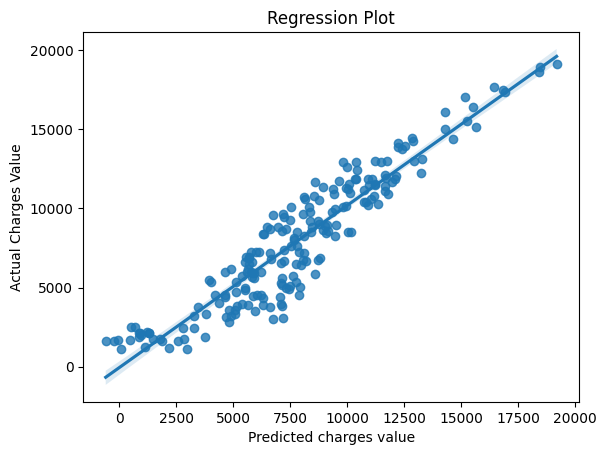

In [ ]:
sns.regplot(x=prediction,y=y_test)
plt.xlabel('Predicted charges value')
plt.ylabel('Actual Charges Value')
plt.title('Regression Plot')
plt.show()


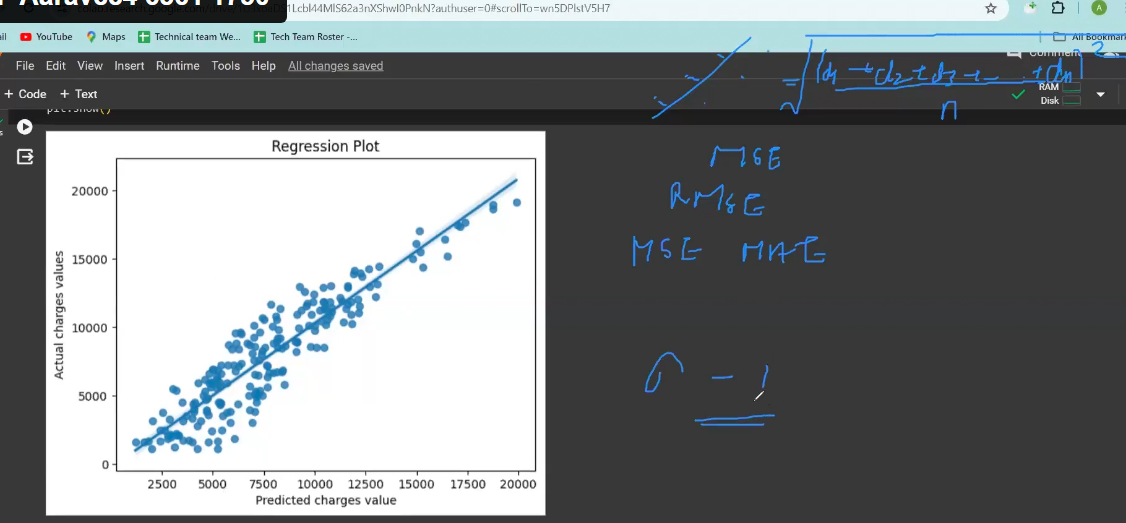